In [1]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load and display the data
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


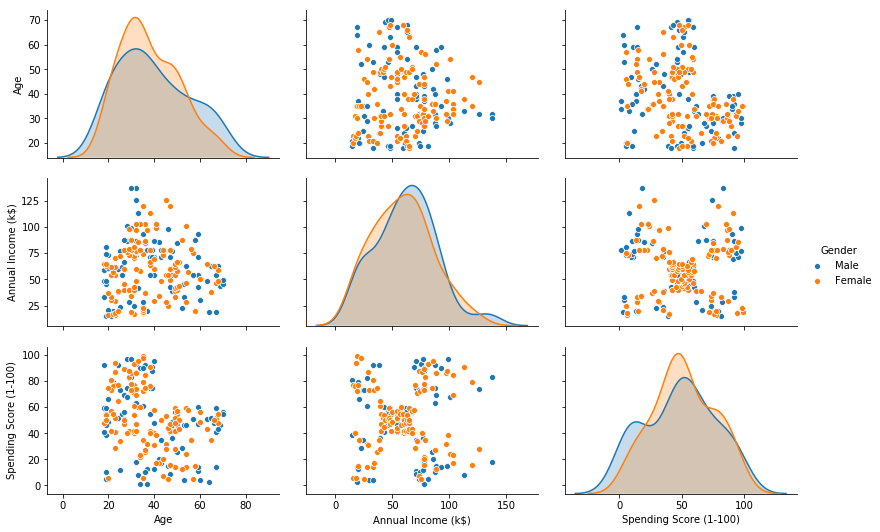

In [4]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

Converting the Gender feature type from string to numerical feature.

In [5]:
df = pd.concat([df,pd.get_dummies(df.Gender, prefix="Gender", drop_first=True)], axis=1)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [6]:
X = df.drop(['CustomerID', 'Gender'], axis=1)

inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

The Elbow method is a method of interpretation and validation of consistency within-cluster analysis designed to help to find the appropriate number of clusters in a dataset. The following figure demonstrates the elbow method :

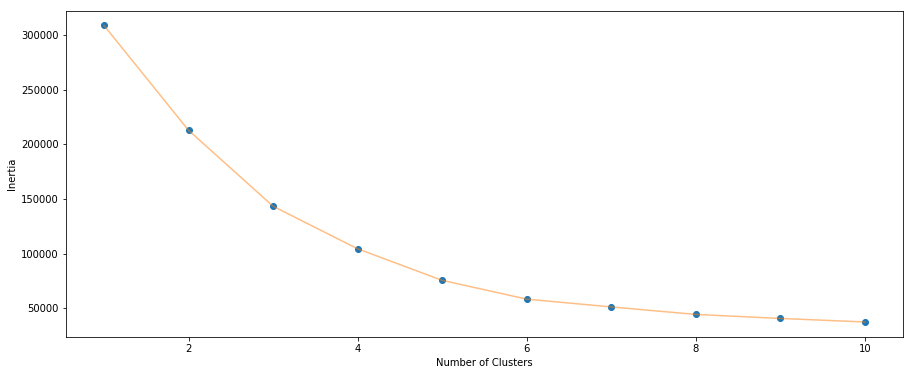

In [7]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

## K Means

I will split the data into half and then cluster them by Kmeans into clusters of 2 to 10 to see which ones are more consistent

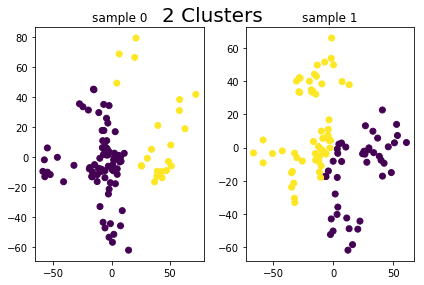

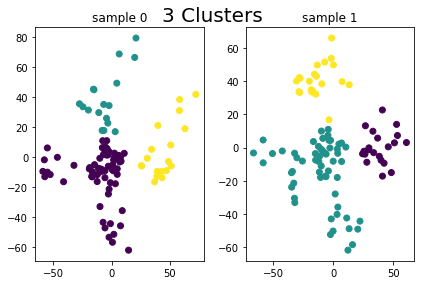

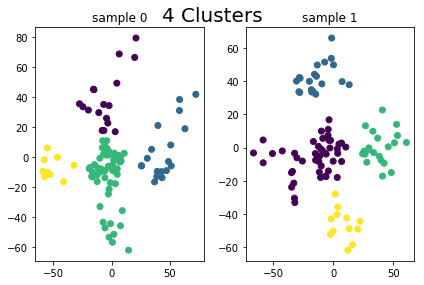

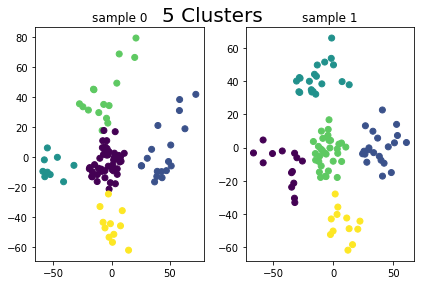

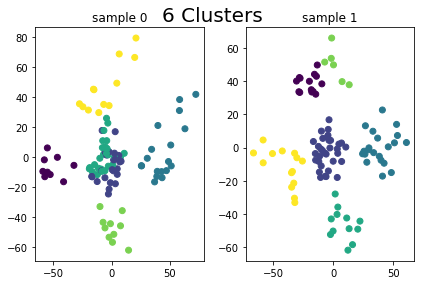

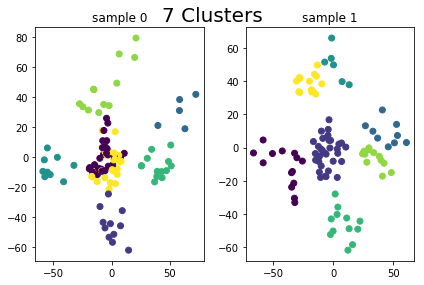

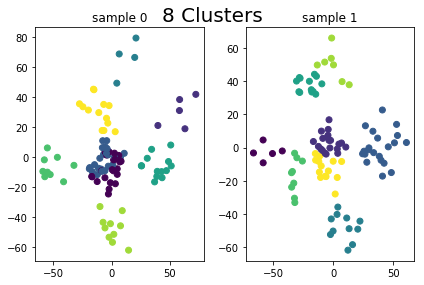

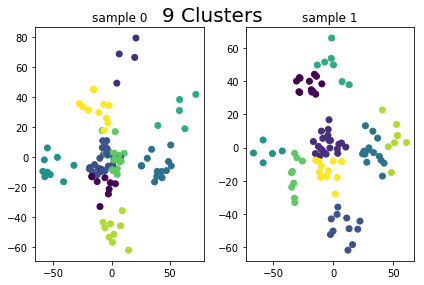

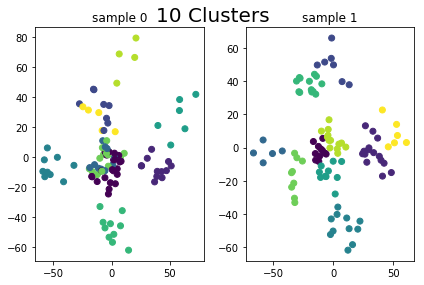

In [8]:
X_std = X

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

from sklearn.model_selection import train_test_split
# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=123)


# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    for nclust in range(2, 11):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 11):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
        axarr[i].set_xlim()
        axarr[i].set_ylim()
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()    

In [9]:
from sklearn.cluster import KMeans

k = range(2,11)
kmean_clusters=pd.DataFrame()

for i in k:
    kmeans = KMeans(n_clusters= i, random_state=123)
    pred = kmeans.fit_predict(X_std)
    kmean_clusters['Cluster with k =' + str(i)]= pred
kmean_clusters

,Cluster with k =2,Cluster with k =3,Cluster with k =4,Cluster with k =5,Cluster with k =6,Cluster with k =7,Cluster with k =8,Cluster with k =9,Cluster with k =10
0,0,2,0,0,5,4,6,4,4
1,1,2,0,4,4,3,0,5,3
2,0,2,2,0,5,4,6,4,6
3,1,2,0,4,4,3,0,5,3
4,0,2,2,0,5,4,6,4,4
5,1,2,0,4,4,3,0,5,3
6,0,2,2,0,5,4,6,4,6
7,1,2,0,4,4,3,0,5,3
8,0,2,2,0,5,4,6,4,6
9,1,2,0,4,4,3,0,5,3


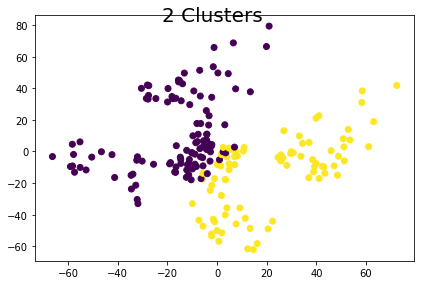

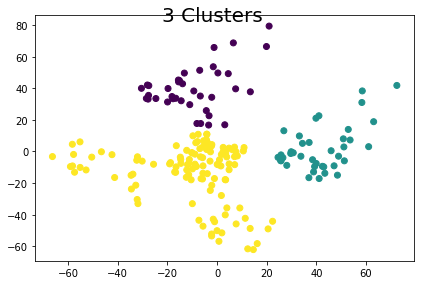

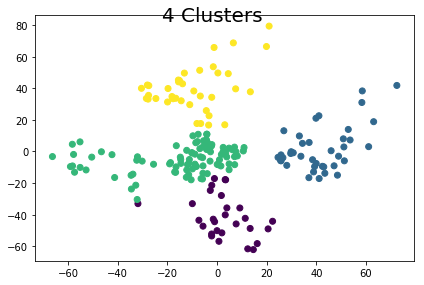

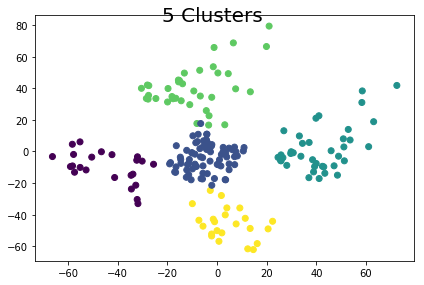

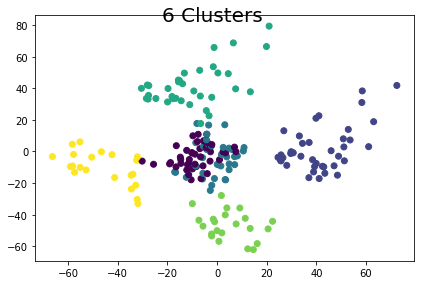

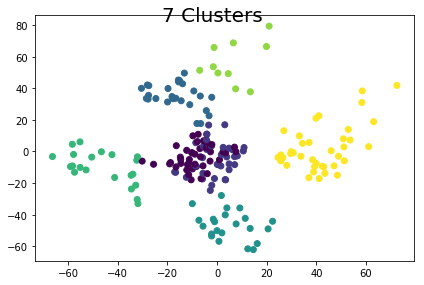

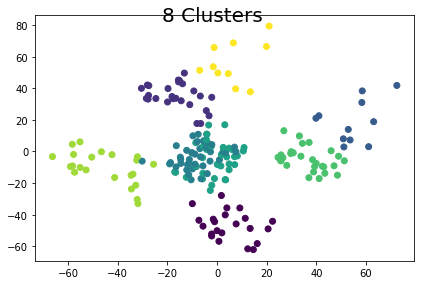

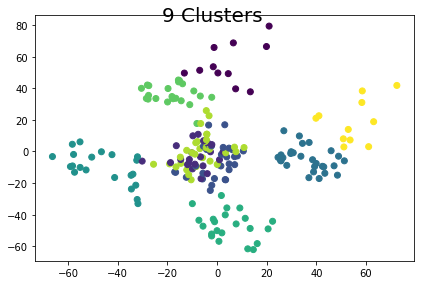

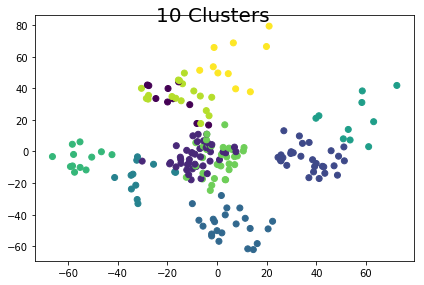

In [10]:
pca = PCA(n_components=2).fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=123)

for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 11):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

for i in range(2, 11):
    
    # PCA-created features.
    x_sub = pca[:,0]
    y_sub = pca[:,1]
        
    # Cluster assignments.
    c = kmean_clusters['Cluster with k =' + str(i)]
        
    plt.scatter(x_sub, y_sub, c=c)
        
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(i), fontsize=20)
    plt.tight_layout()
    plt.show()

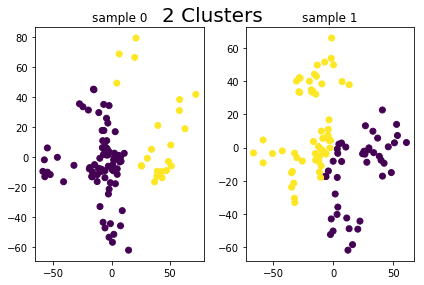

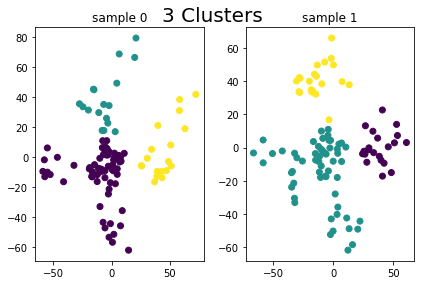

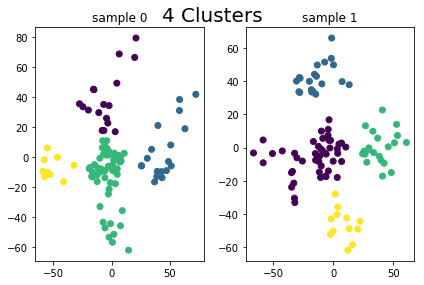

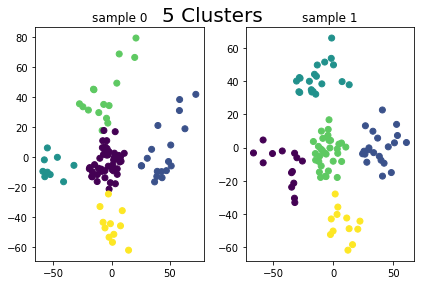

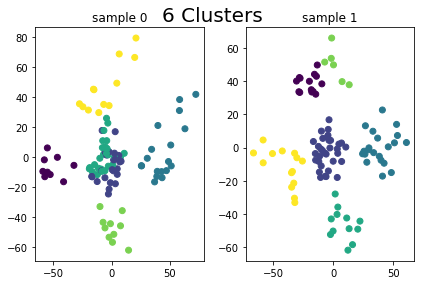

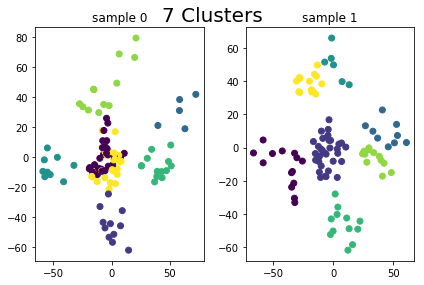

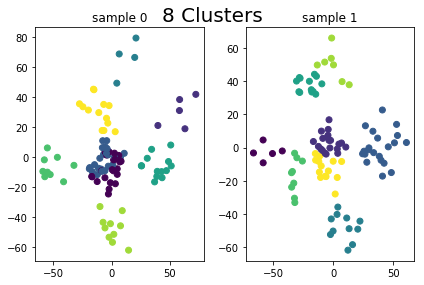

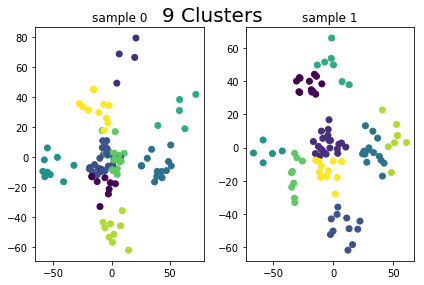

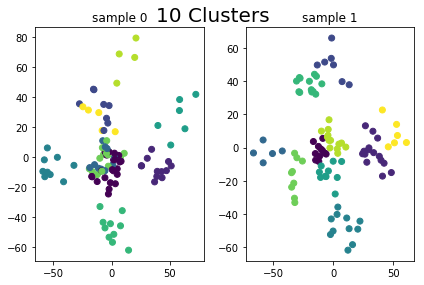

In [11]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 11):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
        axarr[i].set_xlim()
        axarr[i].set_ylim()
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()

In [12]:
for nclust in range(2, 11):
    pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(X_std)
    print('Silhouette score for ' + str(nclust) + ' cluster k-means: {}'.format(
    metrics.silhouette_score(X_std, pred, metric='euclidean')))

Silhouette score for 2 cluster k-means: 0.29307334005502633
Silhouette score for 3 cluster k-means: 0.383798873822341
Silhouette score for 4 cluster k-means: 0.4052954330641215
Silhouette score for 5 cluster k-means: 0.443430209791173
Silhouette score for 6 cluster k-means: 0.45205475380756527
Silhouette score for 7 cluster k-means: 0.4347734443683834
Silhouette score for 8 cluster k-means: 0.4259878450877001
Silhouette score for 9 cluster k-means: 0.384416312448319
Silhouette score for 10 cluster k-means: 0.40497084039097503


By comparing the above graph and also the  Silhoutte score we can see that "5" is the best number for clusters.
Then I will use this cluster as a label and add it to the dataset to do further study.

In [13]:
df['label'] =  KMeans(n_clusters=5, random_state=123).fit_predict(X_std)
df.groupby('label').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,,
0,23.000000,45.217391,26.304348,20.913043,0.391304
1,85.538462,43.282051,55.025641,49.692308,0.423077
2,162.000000,32.692308,86.538462,82.128205,0.461538
3,162.945946,40.324324,87.432432,18.189189,0.513514
4,24.000000,25.521739,26.304348,78.565217,0.391304


- Cluster 0 : earning less , spending less 
- cluster 1 : average in terms of earning and spending 
- cluster 2 : earning high and also spending high [TARGET SET]
- cluster 3 : earning high but spending less
- Cluster 4 : earning less but spending more


In [14]:
def rand_index_score(grount_truths, predictions):
    tp_plus_fp = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    tp_plus_fn = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    A = np.c_[(grount_truths, predictions)]
    tp = sum(scipy.special.comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(grount_truths))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = scipy.special.comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

In [15]:
for nclust in range(2, 11):
    pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(X_std)
    print('Rand Index (RI) for ' + str(nclust) + ' cluster k-means: {}'.format(
    rand_index_score(df['label'],pred)))


Rand Index (RI) for 2 cluster k-means: 0.8728643216080402
Rand Index (RI) for 3 cluster k-means: 0.9922613065326633
Rand Index (RI) for 4 cluster k-means: 0.9607035175879397
Rand Index (RI) for 5 cluster k-means: 1.0
Rand Index (RI) for 6 cluster k-means: 0.828643216080402
Rand Index (RI) for 7 cluster k-means: 0.8067336683417086
Rand Index (RI) for 8 cluster k-means: 0.777788944723618
Rand Index (RI) for 9 cluster k-means: 0.7226130653266332
Rand Index (RI) for 10 cluster k-means: 0.7474371859296483


## Agglomerative Clustering

In [16]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=5)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

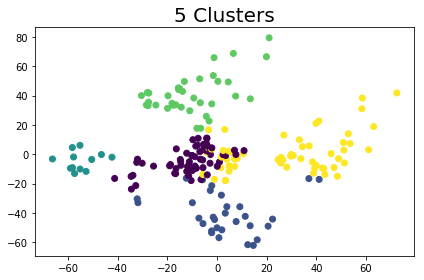

In [17]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)
        
plt.title('5 Clusters', fontsize=20) 
plt.tight_layout()
plt.show()

In [18]:
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhoutte score of the Agglomerative Clustering solution: 0.36974071236149286


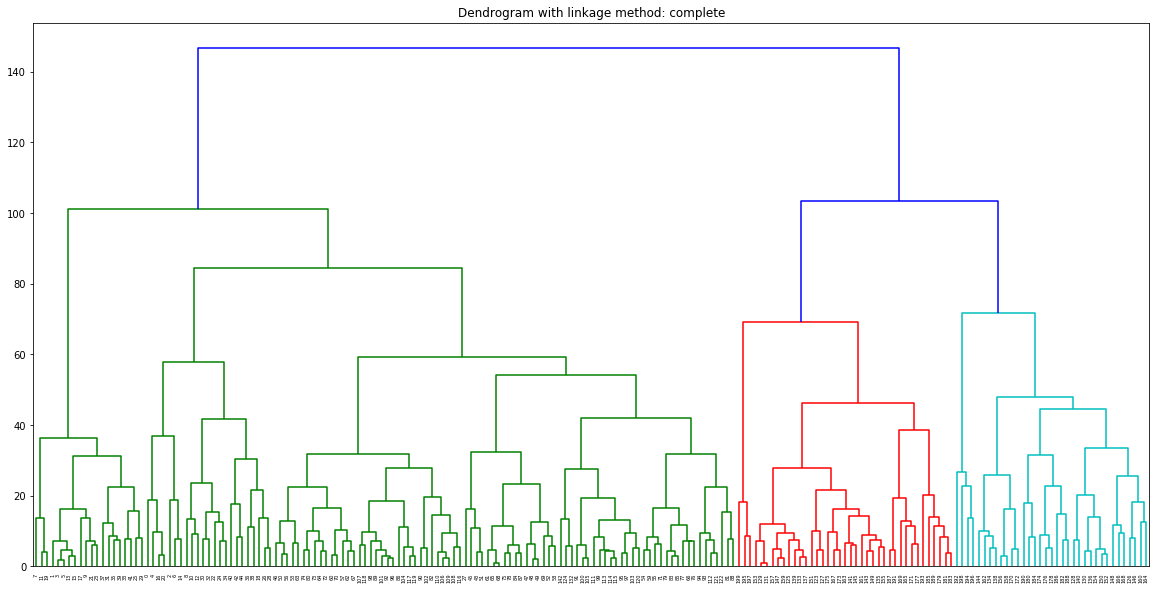

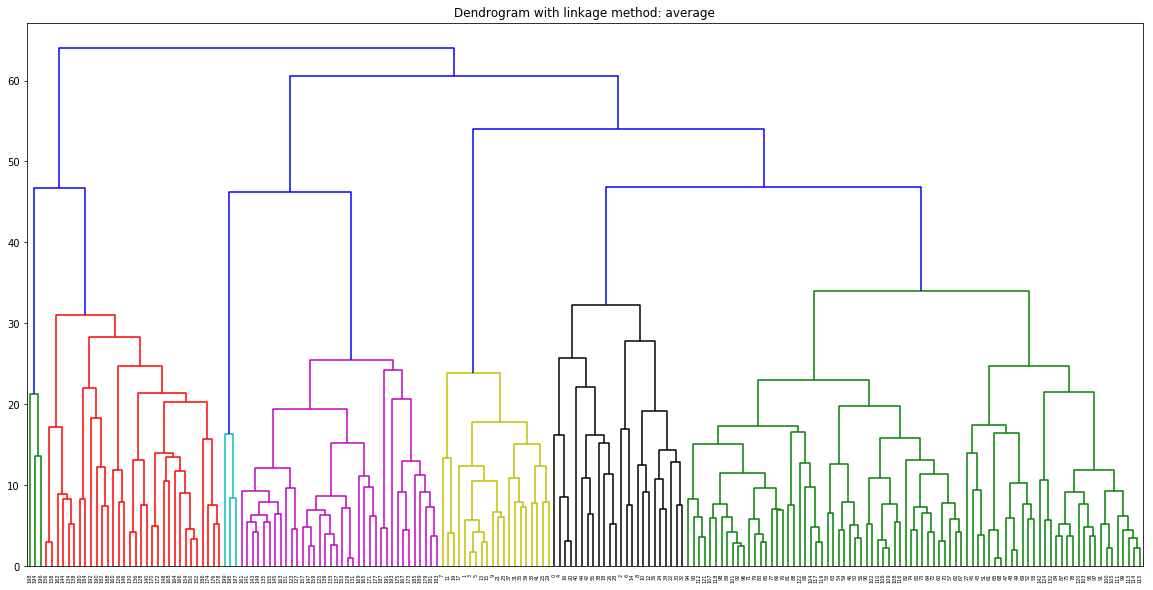

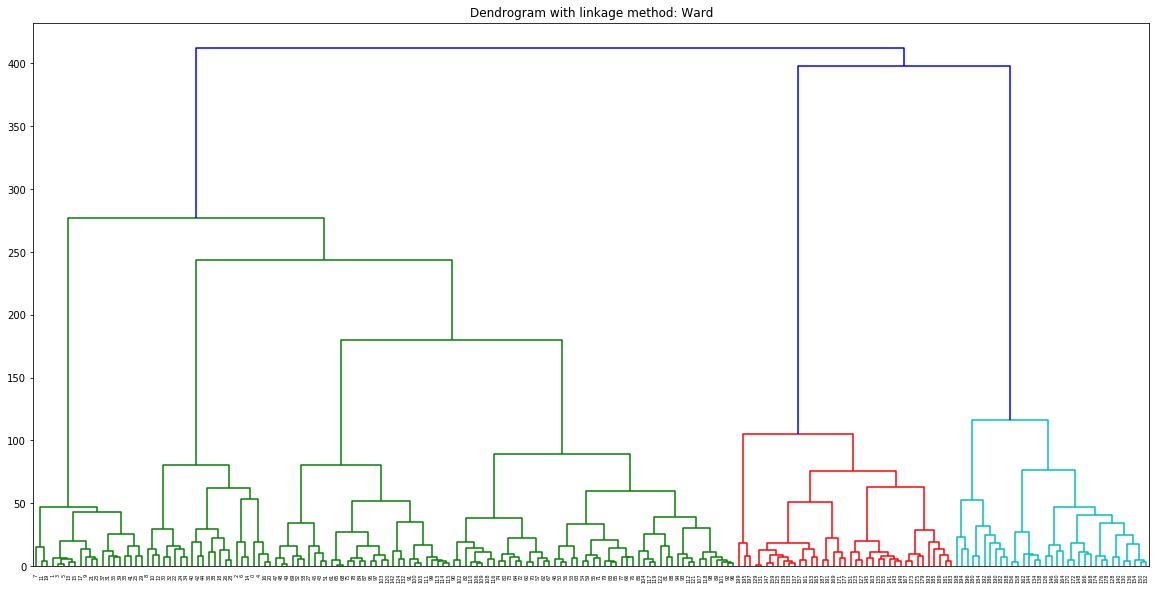

In [19]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: complete")
dendrogram(linkage(X_std, method='complete'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: average")
dendrogram(linkage(X_std, method='average'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: Ward")
dendrogram(linkage(X_std, method='ward'))
plt.show()

The more reasonable result is that of the ward method's. The complete and average methods produced results that are hard to reconcile with the facts as their two cluster solutions has too few observations for one of the clusters.

In [20]:
for nclust in range(2, 11):
    agg_cluster = AgglomerativeClustering(linkage='ward', 
                                          affinity='euclidean',
                                          n_clusters=nclust)

    # Fit model
    clusters = agg_cluster.fit_predict(X_std)

    print("The silhoutte score of the Agglomerative Clustering solution for {} clusters: {}"
          .format(nclust,metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhoutte score of the Agglomerative Clustering solution for 2 clusters: 0.29916602844367
The silhoutte score of the Agglomerative Clustering solution for 3 clusters: 0.3812859576468096
The silhoutte score of the Agglomerative Clustering solution for 4 clusters: 0.4102091359195185
The silhoutte score of the Agglomerative Clustering solution for 5 clusters: 0.43997527212476695
The silhoutte score of the Agglomerative Clustering solution for 6 clusters: 0.4428008535928764
The silhoutte score of the Agglomerative Clustering solution for 7 clusters: 0.42593881050851595
The silhoutte score of the Agglomerative Clustering solution for 8 clusters: 0.4223297424559345
The silhoutte score of the Agglomerative Clustering solution for 9 clusters: 0.37773214836148283
The silhoutte score of the Agglomerative Clustering solution for 10 clusters: 0.3612629591916317


## DBSCAN clustering

In [21]:
# Defining the DBSCAN clustering
from sklearn.cluster import DBSCAN

dbscan_cluster = DBSCAN(eps=.4, min_samples=6)
XX_std = StandardScaler().fit_transform(X)
# Fit model
clusters = dbscan_cluster.fit_predict(XX_std)

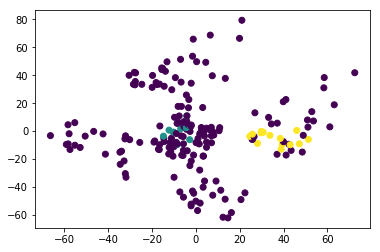

In [22]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)
plt.show()

In [23]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(XX_std, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.1408945206711457


Try different epsilon and points.

In [24]:
print("Number of clusters when min_samples=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in range(2,51):
    dbscan_cluster = DBSCAN(eps=.4, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(XX_std)
    print("Number of clusters when min_samples={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when min_samples=1 is: 3
Number of clusters when min_samples=2 is: 35
Number of clusters when min_samples=3 is: 19
Number of clusters when min_samples=4 is: 9
Number of clusters when min_samples=5 is: 5
Number of clusters when min_samples=6 is: 3
Number of clusters when min_samples=7 is: 3
Number of clusters when min_samples=8 is: 1
Number of clusters when min_samples=9 is: 1
Number of clusters when min_samples=10 is: 1
Number of clusters when min_samples=11 is: 1
Number of clusters when min_samples=12 is: 1
Number of clusters when min_samples=13 is: 1
Number of clusters when min_samples=14 is: 1
Number of clusters when min_samples=15 is: 1
Number of clusters when min_samples=16 is: 1
Number of clusters when min_samples=17 is: 1
Number of clusters when min_samples=18 is: 1
Number of clusters when min_samples=19 is: 1
Number of clusters when min_samples=20 is: 1
Number of clusters when min_samples=21 is: 1
Number of clusters when min_samples=22 is: 1
Number of cluster

In [25]:
# Defining the agglomerative clustering
from sklearn.cluster import DBSCAN

dbscan_cluster = DBSCAN(eps=0.09, min_samples=4)

# Fit model
clusters = dbscan_cluster.fit_predict(XX_std)

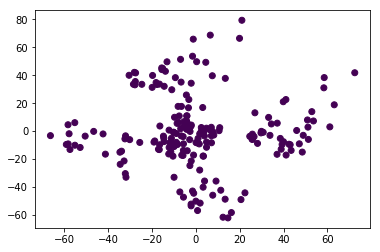

In [26]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)
plt.show()

In [27]:
for i in [0.5,0.1,.4,1,2,3,4,5,6,7,8,9,10]:

    dbscan_cluster = DBSCAN(eps=i, min_samples=6, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(XX_std)
    print("Number of clusters when epsilon={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when epsilon=0.5 is: 6
Number of clusters when epsilon=0.1 is: 1
Number of clusters when epsilon=0.4 is: 3
Number of clusters when epsilon=1 is: 3
Number of clusters when epsilon=2 is: 2
Number of clusters when epsilon=3 is: 1
Number of clusters when epsilon=4 is: 1
Number of clusters when epsilon=5 is: 1
Number of clusters when epsilon=6 is: 1
Number of clusters when epsilon=7 is: 1
Number of clusters when epsilon=8 is: 1
Number of clusters when epsilon=9 is: 1
Number of clusters when epsilon=10 is: 1


## Gaussian Mixture

In [28]:
from sklearn.mixture import GaussianMixture

# Defining the Gaussian Mixture Models clustering
gmm_cluster = GaussianMixture(n_components=5, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

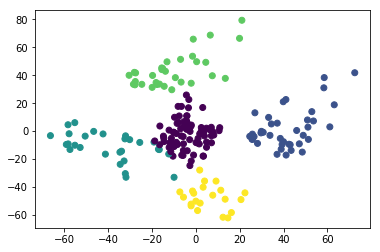

In [29]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)
plt.show()

In [30]:
print("The silhouette score of the Gaussian Mixture Models solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhouette score of the Gaussian Mixture Models solution: 0.4268789464126624


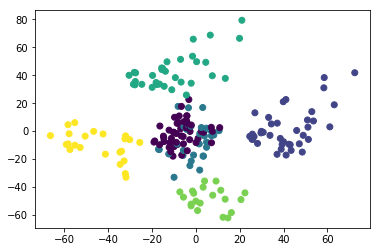

In [31]:
gmm_cluster = GaussianMixture(n_components=6, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)
plt.show()

In [32]:
print("The silhouette score of the Gaussian Mixture Models solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhouette score of the Gaussian Mixture Models solution: 0.44554665984545394


Comparing the silhouette score of different approches shows that KMeans with 5 clusters have the best and more accurate result. Although the Gaussian Mixture Models and KMeans with 6 clusters have better results, the clusters are more mixed and inaccurate.

## T-SNE and Umap
### Kmeans

In [33]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 13.156547
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.880230
[t-SNE] KL divergence after 300 iterations: 0.279473


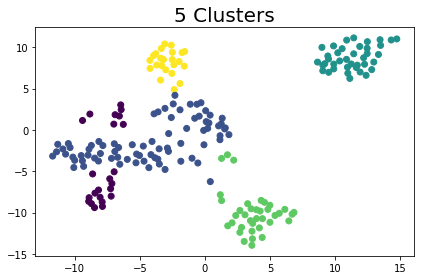

In [34]:
kmeans = KMeans(n_clusters=5, random_state=123)
kmean_clusters = kmeans.fit_predict(X_std)

plt.scatter(tsne_results[:,0], tsne_results[:,1], c=kmean_clusters)
        
plt.title('5 Clusters', fontsize=20) 
plt.tight_layout()
plt.show()

In [35]:
!pip install umap-learn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [36]:
import umap
import time

time_start = time.time()
umap_results = umap.UMAP(n_neighbors=15,
                      min_dist=1,
                      metric='correlation').fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 7.509165287017822 seconds


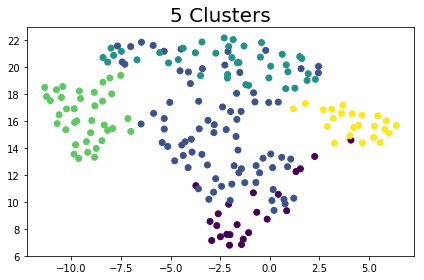

In [37]:
kmeans = KMeans(n_clusters=5, random_state=123)
kmean_clusters = kmeans.fit_predict(X_std)

plt.scatter(umap_results[:,0], umap_results[:,1], c=kmean_clusters)
        
plt.title('5 Clusters', fontsize=20) 
plt.tight_layout()
plt.show()

As you can see in thw above reslts PCA works better with this dataset to visualize the clustering.

### Gaussian Mixture

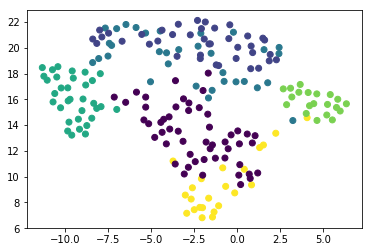

In [38]:
gmm_cluster = GaussianMixture(n_components=6, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)
plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
plt.show()

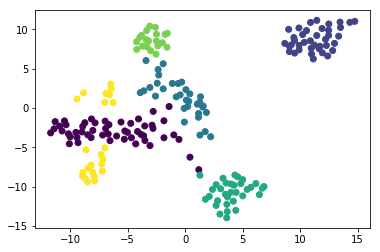

In [39]:
gmm_cluster = GaussianMixture(n_components=6, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clusters)
plt.show()

## agglomerative clustering

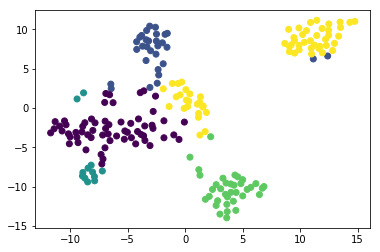

In [40]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=5)

# Fit model
clusters = agg_cluster.fit_predict(X_std)
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clusters)
plt.show()

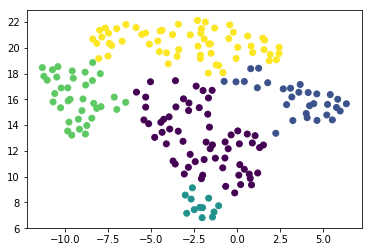

In [41]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=5)

# Fit model
clusters = agg_cluster.fit_predict(X_std)
plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
plt.show()

Try umap and t-sne in kmeans , gaussian and agglomerative clustering shows that PCA has better result.

Now Let's drop all features and only keep Annual income and Spending feature and cluster the data.

In [43]:
df = pd.read_csv('Mall_Customers.csv')
X=df.iloc[:, [3,4]].values
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

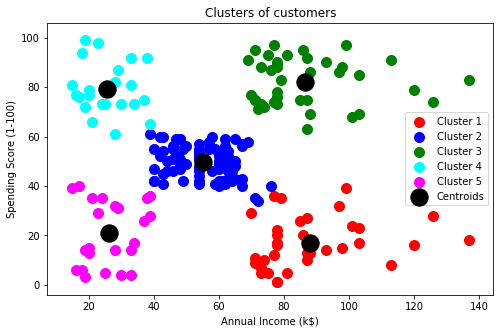

In [44]:
#Visualizing all the clusters 
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

The above graph also show the above result of kMeans clusteing. Five categories with specific explonation for each.

- Cluster 1 (Red Color)  earning high but spending less
- cluster 2 (Blue Colr)  average in terms of earning and spending 
- cluster 3 (Green Color)  earning high and also spending high 
- cluster 4 (cyan Color)  earning less but spending more
- Cluster 5 (magenta Color)  Earning less , spending less